In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [3]:
from numpy.random import rand, randn

In [4]:
n, d, k = 100, 2, 2

In [5]:
np.random.seed(20)
X = rand(n, d)
print(X)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[[0.5881308  0.89771373]
 [0.89153073 0.81583748]
 [0.03588959 0.69175758]
 [0.37868094 0.51851095]
 [0.65795147 0.19385022]
 [0.2723164  0.71860593]
 [0.78300361 0.85032764]
 [0.77524489 0.03666431]
 [0.11669374 0.7512807 ]
 [0.23921822 0.25480601]
 [0.85762553 0.94977903]
 [0.56168686 0.17878052]
 [0.77025193 0.49238104]
 [0.63125307 0.83949792]
 [0.4610394  0.49794007]
 [0.67941112 0.65078591]
 [0.26879524 0.06732467]
 [0.77144514 0.48098413]
 [0.32920641 0.51064106]
 [0.26362883 0.31051155]
 [0.62685344 0.55744981]
 [0.31857956 0.39484322]
 [0.25797459 0.58224112]
 [0.16162871 0.59813382]
 [0.82582358 0.15639172]
 [0.73430052 0.40864343]
 [0.7786879  0.80397057]
 [0.78607144 0.59228702]
 [0.6644892  0.64656729]
 [0.42563648 0.51356833]
 [0.50125784 0.03708381]
 [0.7081161  0.6204306 ]
 [0.77780853 0.45940947]
 [0.37980555 0.2918922 ]
 [0.55722886 0.0841636 ]
 [0.63128167 0.94457049]
 [0.89123753 0.87858258]
 [0.34475163 0.70310053]
 [0.5273376  0.65931696]
 [0.26829063 0.60776708]


Solution
===

In [38]:
def compute_log_p(X, mean, sigma):
    ''' fill your code in here...
    '''
    print('mean', mean, 'sigma', sigma)

    return [(1 / (((2*np.pi)**(2/d)) * (np.linalg.det(sigma)**0.5))) * np.e**(-0.5 * np.dot(np.dot(np.transpose(x - mean), np.linalg.inv(sigma)), x - mean)) for x in X]



In [39]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping
print(log_ps)

mean [0.69872366 0.75176984] sigma [[0.01764816 0.        ]
 [0.         0.06360523]]
mean [0.25997411 0.14504062] sigma [[0.01764816 0.        ]
 [0.         0.06360523]]
[[2.8412990059526972, 1.6043749658250293, 1.8137278995644417e-05, 0.17009020951763515, 0.3922692900688791, 0.027275524672285435, 3.5988470057714324, 0.07225158307243672, 0.0003225169481690092, 0.0017202031508502806, 1.7068290781193978, 0.21124841488614526, 2.4214210998490526, 3.930400864347446, 0.5776290649336346, 4.338302621576469, 0.0006354690712801457, 2.2978624995897494, 0.06282989166186813, 0.004816212022826773, 3.0496890050678105, 0.029087989738943765, 0.015430756753123333, 0.0011135851837075724, 0.1852610781815696, 1.8163621942380248, 3.879219768916858, 3.133380986716928, 4.212296145492078, 0.3676258556089714, 0.028390062890595095, 4.1375886690765356, 2.032166321160731, 0.050496365100205, 0.08105455332892637, 3.1178425087477732, 1.464897725146263, 0.13395610578362266, 1.9325383160783807, 0.021197767878068756, 

In [40]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]


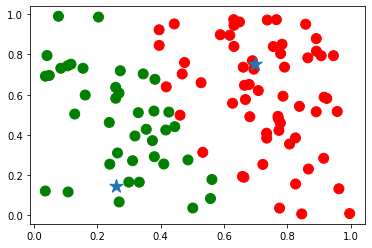

In [41]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()